In [2]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
#url = 'https://raw.githubusercontent.com/DAVE3625-22H/Lab-0/main/Titanic.csv'


df = pd.read_csv('data/Titanic.csv', sep=',')
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


to your imports.

Load the titanic set found under /data/Titanic.csv as we did in Lab1

Hint: Click view as "Raw" and copy the url

Task
1. Check for null and nan values

In lab 1 we used df.isna().sum() to check for nan values. Since we didn’t find many, we converted blankspace into np.nan to help us procide. Lets try it again on this dataset.

In [7]:
#Check for nan value
df.isna().sum()


PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [9]:
# Fill nan value with median of age
df["Age"] = df["Age"].fillna(df["Age"].median())

In [11]:
#Check again the nan value 
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df["Fare"] = df["Fare"].fillna(df["Fare"].median())


In [13]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [14]:
df["Embarked"]=df["Embarked"].fillna("S")

In [15]:
df.isna().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

We can also see that many people has a NaN for Cabin. It’s not as easy as just fill a dummy value here. We could fill with “no cabin”, but for machine learning, we like to have numerical or bool values. To achieve this, lets make a new bool column:

Cabin = True / False And set all NaN values = False, all other = True

In [22]:
# Get the wrong boolean, needs to use ~ to get the correct one
df["HasCabin"]= ~df.Cabin.isnull()

In [21]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


In [27]:
# Adding a feature extracting the name from the df["Title"] = df.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1)) name column
#Could also be done like this 
df['Title']=df['Name'].str.extract(r'([A-Z][a-z]+)\.')

In [26]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr


In [28]:
#Count the column title 
df["Title"].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [29]:
#Replace Mlle and Ms with "Miss", and Mme with "Mr" using:
df["Title"] = df["Title"].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mr'})


In [30]:
df["Title"].value_counts()

Title
Mr          758
Miss        264
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [34]:
#We can also package all titles with few persons into a unique category
df["Title"] = df["Title"].replace(["Rev", "Dr", "Col", "Major", "Don", "Lady", "Sir", "Capt", "Countess", "Jonkheer", "Dona"], "Unique")

In [35]:
df["Title"].value_counts()

Title
Mr        758
Miss      264
Mrs       197
Master     61
Unique     29
Name: count, dtype: int64

In [36]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,Titlle
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,Mr


In [37]:
#Reverta a column I made by mistake
df.drop(columns=['Titlle'], inplace=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Unique')])

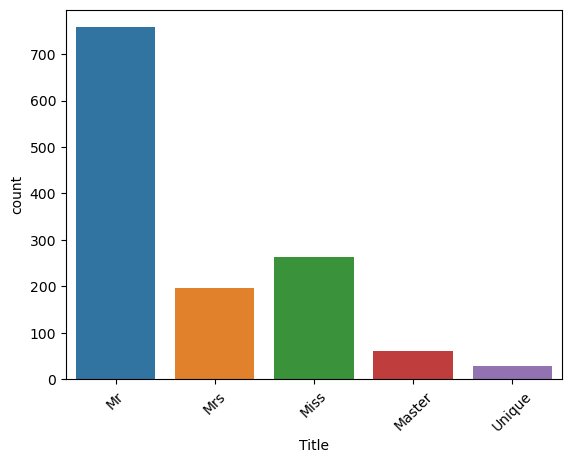

In [39]:
#You can also produce a plot using seaborn countplot
sns.countplot(x='Title', data=df)
plt.xticks(rotation=45)

In [40]:
# 3. Converte age and fare into cathegorical data
# Can be done using Pandas qcut function
df['CatAge'] = pd.qcut(df["Age"], q=4, labels=False)

In [41]:
df['CatFare'] = pd.qcut(df["Fare"], q=4, labels=False)

In [42]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,Mr,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,Mrs,3,3
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,Miss,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,Mrs,2,3
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,Mr,2,1


To train a dataset easily, we want all data to be numerical. To achieve this, we need to drop columns that don’t make sense converting to a numerical value. 

In [44]:
#Dropping colums that wont make sence in binary
df = df.drop(["Age", "Ticket", "Fare", "Cabin", "Name"], axis=1)

In [45]:
df.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,HasCabin,Title,CatAge,CatFare
0,1,3,male,1,0,S,False,Mr,0,0
1,2,1,female,1,0,C,True,Mrs,3,3
2,3,3,female,0,0,S,False,Miss,1,1
3,4,1,female,1,0,S,True,Mrs,2,3
4,5,3,male,0,0,S,False,Mr,2,1


In [46]:
#Converting to binary value
df_dum = pd.get_dummies(df, drop_first=True)

In [47]:
df_dum.head()

,PassengerId,Pclass,SibSp,Parch,HasCabin,CatAge,CatFare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Unique
0,1,3,1,0,False,0,0,True,False,True,False,True,False,False
1,2,1,1,0,True,3,3,False,False,False,False,False,True,False
2,3,3,0,0,False,1,1,False,False,True,True,False,False,False
3,4,1,1,0,True,2,3,False,False,True,False,False,True,False
4,5,3,0,0,False,2,1,True,False,True,False,True,False,False
